# TP 3 Regression linéaire
Dans ce TP, nous aimerions prédire l'admission d'un étudiant à une specialité donnée selon ses notes dans deux matières.

Pour ce faire, nous étudierons un ensemble de données avec l'admission  (y) et les notes des deux modules (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [3]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)
data.shape

(100, 3)

Dans ces données (data), la première colonne represente la première note, la deuxieme colonne la deuxième note et la troisième colonne represente l'admission à la specialité (1 admis 0 non admis).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [4]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0:2]))
y = data[:, 2][:,None]

In [5]:
print('X', X.shape ,' y ', y.shape)


X (100, 3)  y  (100, 1)


# Descente du Gradient : Préparation des fonctions

0- Fonction mpgistique (Sigmoid)

In [6]:
def Sigmoid(z):
    return 1/(1 + np.exp(-z))
    
 

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [7]:
def computeCost(X, y, theta):
    y_hat = Sigmoid(X.dot(theta))
    cost = -(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)).mean(axis=0)
    return cost[0]

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [8]:
def gradientDescent(X, y, theta, alpha, iterations):
    saved_theta =  np.zeros((theta.shape[0],iterations))
    costs = np.zeros(iterations)
    for i in range(iterations):
        Trans_X = X.T
        y_hat = Sigmoid(np.matmul(X,theta))
        error = y_hat - y
        theta = theta - (alpha * Trans_X.dot(error))
        saved_theta[:,i] = theta[:,0]
        costs[i] = computeCost(X, y, theta)
    
    return theta, saved_theta, costs

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [9]:
n=X.shape[1]
theta = np.zeros((n, 1))

Calculer le cout initial

In [10]:
theta = np.zeros((n, 1))
initialCost=computeCost(X, y, theta)
initialCost

0.6931471805599453

Appel des la fonction de calcul du gradient

In [11]:
# paramètres
iterations = 8000;
alpha = 0.001;
# Appel
theta, thetas, costs = gradientDescent(X, y, theta, alpha, iterations)
theta


array([[-23.84194276],
       [  1.03890082],
       [  1.00387613]])

Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

# Dessin de la limite de decision (Descision Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice d nos données

In [12]:
def drawLine(theta):
    x = np.linspace(4,22)
    a = theta[1][0]
    c = theta[0][0]
    b = theta[2][0]
    fx = (a*x + c) / (-b)
    plt.plot(x, fx, '-g', label='Decision boundary')
    pass

# Affichage 
Graphe representant les acceptations selon les caracteristiques

Text(0, 0.5, 'Note module 2')

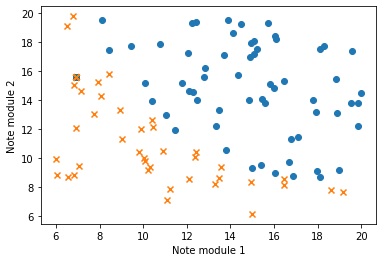

In [13]:
plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="accepte",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="non accepte",marker ='x')
drawLine(theta)
plt.xlabel('Note module 1')
plt.ylabel('Note module 2')

Traçage du coût en fonction de theta0 et theta1

Text(0.5, 0, 'cout')

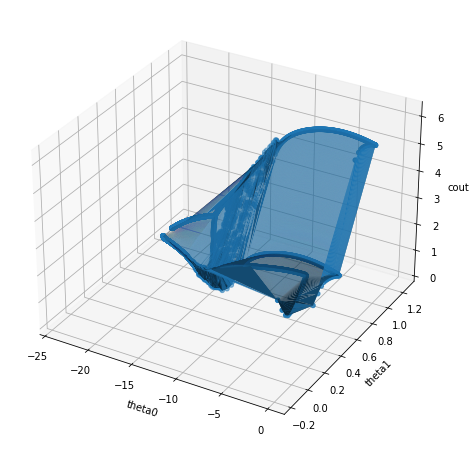

In [14]:
theta0 = thetas[0,:]
theta1 = thetas[1,:]
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(theta0, theta1, costs)
ax.plot_trisurf(theta0, theta1, costs)
ax.set_ylabel('theta1')
ax.set_xlabel('theta0')
ax.set_zlabel('cout')


Prédire des valeurs de y

In [15]:
# Predire pour des notes note1= 9 et note2=17
def model_pred(note):
    if note > 0.5:
        return 1
    else:
        return 0
model_pred(Sigmoid(theta[0][0] + theta[1][0]*9 + theta[2][0] * 17))


1

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import random

def compareTO_sklearn(X, y, theta): 
    comp = LogisticRegression(max_iter=8000)
    comp.fit(X[:, 1:], np.squeeze(y, axis=1))
    notes = random.randint(0,len(y))
    prediction = Sigmoid(X[notes,:] @ theta)

    print("Sklearn prediction:",int(comp.predict(X[notes,1:][None, :])))
    print("Model prediction:",model_pred(prediction))
    print("Real value:",int(y[notes]))

    theta_sk = np.zeros(theta.shape)
    theta_sk[1:] = comp.coef_.reshape(-1, 1)
    theta_sk[0] = comp.intercept_[0]
    theta_sk = np.reshape(theta_sk, (-1, 1))

    print("sklearn theta:", theta_sk)
    print("our model theta    :", theta)

    print("\n=== Cost error")
    print("our model error     : ", computeCost(X, y, theta))
    print("sklearn model error : ", computeCost(X, y, theta_sk))

In [17]:
compareTO_sklearn(X, y, theta)

Sklearn prediction: 1
Model prediction: 1
Real value: 1
sklearn theta: [[-22.93181743]
 [  0.94159608]
 [  0.91667148]]
our model theta    : [[-23.84194276]
 [  1.03890082]
 [  1.00387613]]

=== Cost error
our model error     :  0.2614397991015464
sklearn model error :  0.2042989289121221


# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

In [18]:
mean, std = X[:, 1:].mean(axis=0), X[:, 1:].std(axis=0)
X_std = np.full_like(X,1)
X_std[:, 1:] = (X[:, 1:] - mean) / std

theta_std = np.zeros((3,1))
theta_std = gradientDescent(X_std, y, theta_std, alpha, iterations)[0]

compareTO_sklearn(X_std, y, theta_std)

Sklearn prediction: 1
Model prediction: 1
Real value: 1
sklearn theta: [[1.00243883]
 [2.28484693]
 [2.09157282]]
our model theta    : [[1.71277883]
 [3.98077198]
 [3.71343788]]

=== Cost error
our model error     :  0.20349543319782165
sklearn model error :  0.23181849225128423


# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 25 Mars 2022 à 22h


In [19]:
# bonne chance